In [25]:
import pandas as pd
import numpy as np
import datetime
import os
import re
import matplotlib.pyplot as plt

In [26]:
dir = "./../data/mock study/"
files = os.listdir(dir)
files_needed = []

In [27]:
for file in files:
    if 'sensor' in file:
        files_needed.append(file)
files_needed = sorted(files_needed)

In [28]:
# read all files and add them to one dataframe
data_list = []
for file in files_needed:
    data = pd.read_json("./../data/mock study/"+file)
    data_list.append(data)
data = pd.concat(data_list)

In [29]:
# read time 
# participant data
pData = pd.read_csv("./../data/mock study/participant.txt")

In [30]:
# Given the input data, select certain period of data using start time and end time
def selectPeriod(start, end, input):
    start = pd.to_datetime(start, format="%d/%m/%Y %H:%M:%S%z")
    end = pd.to_datetime(end, format="%d/%m/%Y %H:%M:%S%z")
    return input[(input['timestamp'] > start) & (input['timestamp'] <= end)].copy()

In [31]:
# create patient data by cropping time
data_list = []
for i in range(pData.shape[0]):
    startTime = pData.iloc[i, 0]
    endTime = pData.iloc[i, 1]
    newData = selectPeriod(startTime, endTime, data)
    newData['ActivityNumber'] = pData.iloc[i, 2]
    data_list.append(newData)
# selected participant data
patData = pd.concat(data_list)

In [9]:
patData.query("ActivityNumber == %d"%2)

,steps,heartrate,accelX,accelY,accelZ,gyroA,gyroB,gyroC,locLat,locLon,timestamp,uv,pressure,battery,watchID,id,ActivityNumber
364,NaN,NaN,-3.321238,2.170290,8.827123,NaN,NaN,8.827123,NaN,NaN,2020-10-05 21:15:05.920000-04:00,NaN,NaN,71.0,OPLP,6334,2
365,NaN,NaN,-3.203990,2.380858,8.898908,NaN,NaN,8.898908,NaN,NaN,2020-10-05 21:15:05.192000-04:00,NaN,NaN,71.0,OPLP,6335,2
366,NaN,NaN,-3.292524,2.294717,8.968300,NaN,NaN,8.968300,NaN,NaN,2020-10-05 21:15:05.292000-04:00,NaN,NaN,71.0,OPLP,6336,2
367,NaN,NaN,-3.259024,2.318645,8.975478,NaN,NaN,8.975478,NaN,NaN,2020-10-05 21:15:05.393000-04:00,NaN,NaN,71.0,OPLP,6337,2
368,NaN,NaN,-3.256632,2.335395,8.930015,NaN,NaN,8.930015,NaN,NaN,2020-10-05 21:15:05.492000-04:00,NaN,NaN,71.0,OPLP,6338,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,NaN,NaN,0.076570,2.246860,9.509077,NaN,NaN,9.509077,NaN,NaN,2020-10-05 21:15:35.595000-04:00,NaN,NaN,71.0,OPLP,6639,2
670,NaN,NaN,0.026321,2.246860,9.528220,NaN,NaN,9.528220,NaN,NaN,2020-10-05 21:15:35.695000-04:00,NaN,NaN,71.0,OPLP,6640,2
671,NaN,NaN,0.035892,2.179861,9.530612,NaN,NaN,9.530612,NaN,NaN,2020-10-05 21:15:35.795000-04:00,NaN,NaN,71.0,OPLP,6641,2
672,NaN,NaN,0.117248,2.249253,9.485149,NaN,NaN,9.485149,NaN,NaN,2020-10-05 21:15:35.895000-04:00,NaN,NaN,71.0,OPLP,6642,2


In [32]:
def draw_plot(activity):
    x = patData.query("ActivityNumber == %d"%activity)['accelX']
    y = patData.query("ActivityNumber == %d"%activity)['accelY']
    z = patData.query("ActivityNumber == %d"%activity)['accelZ']
    
    index = [i for i in range(len(x))]
    
    plt.plot(index, x, 'r-', label='X')
    plt.plot(index, y, 'b-', label='Y')
    plt.plot(index, z, 'g-', label='Z')

    plt.title('Accelerometer data for Activity #%d'%activity)
    plt.xlabel('index')
    plt.ylabel('Accel')
    
    plt.legend()

    plt.show()

In [11]:
pData

,Start Time,End Time,Activity Number,Activity
0,05/10/2020 21:13:38-04:00,05/10/2020 21:14:21-04:00,1,Mobile Phone
1,05/10/2020 21:15:05-04:00,05/10/2020 21:15:36-04:00,2,Lying Flat
2,05/10/2020 21:16:04-04:00,05/10/2020 21:16:38-04:00,3,Computer Tasks
3,05/10/2020 21:17:34-04:00,05/10/2020 21:18:13-04:00,4,Writing
4,05/10/2020 21:18:54-04:00,05/10/2020 21:19:23-04:00,7,Repeated Face Touching
5,05/10/2020 21:20:13-04:00,05/10/2020 21:20:45-04:00,8,Eating and Drinking
6,05/10/2020 21:22:19-04:00,05/10/2020 21:22:50-04:00,9,Simulated Smoking
7,05/10/2020 21:23:43-04:00,05/10/2020 21:24:12-04:00,10,Adjusting Eyeglass


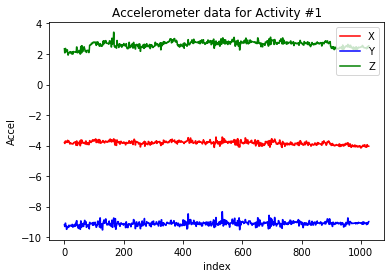

In [34]:
draw_plot(1)

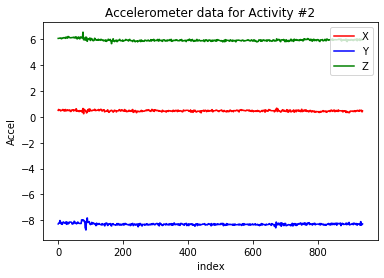

In [35]:
draw_plot(2)

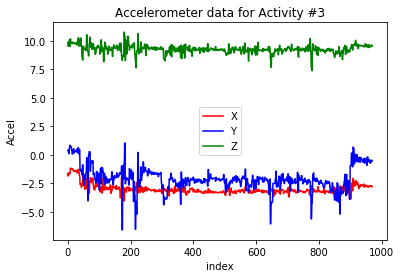

In [36]:
draw_plot(3)

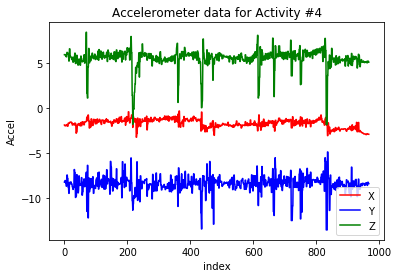

In [37]:
draw_plot(4)

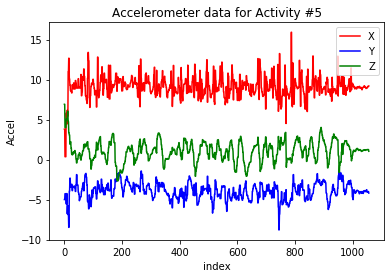

In [38]:
draw_plot(5)

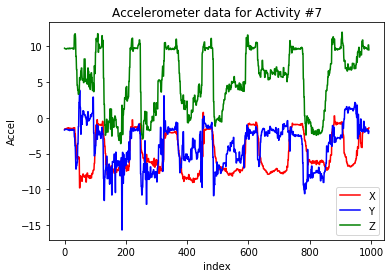

In [40]:
draw_plot(7)

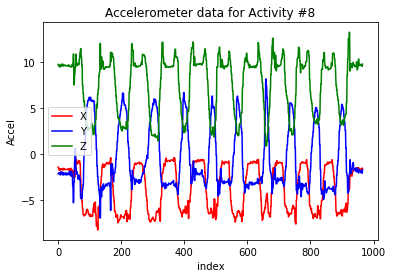

In [41]:
draw_plot(8)

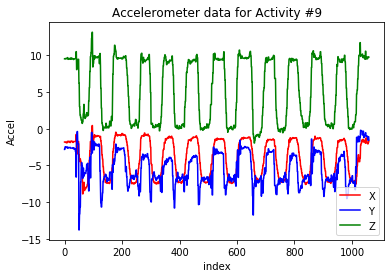

In [42]:
draw_plot(9)

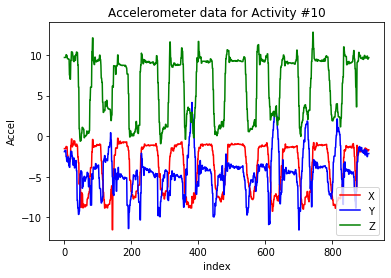

In [43]:
draw_plot(10)